## Multi-Class Classification with Logistic Regression 💐
This notebook demonstrates how to perform **multi-class classification**, a type of classification task where there are more than two possible outcomes. We will use the classic Iris dataset, where the goal is to classify a flower into one of three species: setosa, versicolor, or virginica.

While **Logistic Regression** is commonly used for binary (two-class) problems, `scikit-learn`'s implementation can handle multi-class problems "out of the box" by using a "one-vs-rest" (OvR) strategy. This involves training a separate binary classifier for each class against all the others.

The workflow will cover data exploration, model training, and a detailed evaluation of the model's performance using metrics like accuracy, precision, recall, and the confusion matrix.

## 1. Loading and Exploring the Iris Dataset
First, we'll import our libraries and load the Iris dataset. We'll load it as a pandas DataFrame for easy exploration and visualization.

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Load the Iris Dataset as a DataFrame
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


To make our visualizations more readable, we'll map the numerical `target` (0, 1, 2) to the actual species names.

In [20]:
# Add a column for the target species name
df['target_name'] = df['target'].map({
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#### Data Visualization
Visualizing the data helps us understand the relationships between features and how separable the classes are. The scatter plot of petal dimensions shows a very clear separation between the three species, which suggests that a classification model should perform well.

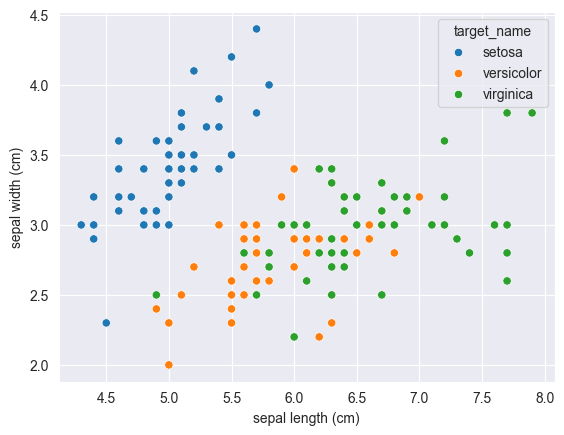

In [21]:
# Visualize Sepal dimensions
sns.scatterplot(df, x='sepal length (cm)', y='sepal width (cm)', hue='target_name')
plt.show()

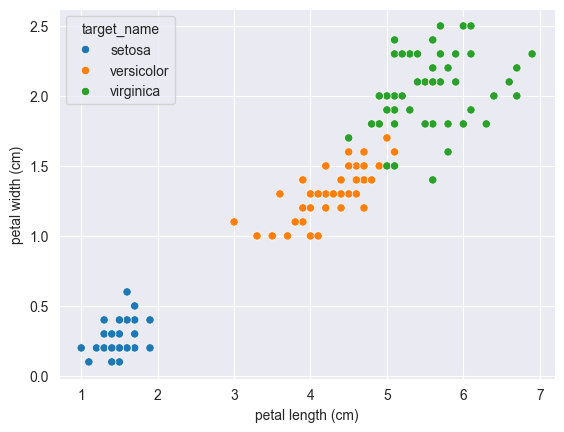

In [22]:
# Visualize Petal dimensions
sns.scatterplot(df, x='petal length (cm)', y='petal width (cm)', hue='target_name')
plt.show()

## 2. Training the Model
We'll now prepare the data for training by separating the features (X) from the target (y) and then splitting them into training and testing sets.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define features (X) and target (y)
X = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = df["target"]

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=5)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


## 3. Evaluating Model Performance
We can now evaluate our trained model on the unseen test data using several standard classification metrics.

#### Accuracy Score
Accuracy is the simplest metric, representing the percentage of correct predictions.

In [24]:
model.score(X_test, y_test)

0.9777777777777777

An accuracy of **97.8%** is an excellent result.

#### Precision, Recall, and F1-Score
The `classification_report` gives a more detailed breakdown of performance for each class.

* **Precision:** Of all the predictions for a class, how many were correct?

* **Recall:** Of all the actual instances of a class, how many did the model correctly identify?

* **F1-Score:** The harmonic mean of precision and recall.

In [25]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### The Confusion Matrix
A confusion matrix provides a visual summary of prediction results, showing where the model is getting confused. The diagonal elements represent correct predictions, while off-diagonal elements are misclassifications.

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]], dtype=int64)

A heatmap makes the confusion matrix even easier to interpret.

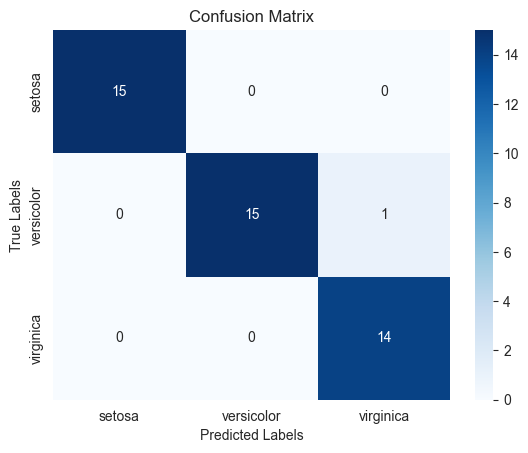

In [27]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The heatmap clearly shows that the model made only **one error:** it misclassified one 'versicolor' flower as a 'virginica'. All other predictions were correct.